In [1]:
import os
import glob
import yaml
import json

import numpy as np
from skimage import io as img_io
import matplotlib.pyplot as plt

## load config file and hyper parameters

In [2]:
with open('./configs/setting.yml', 'r') as config_file:
    exp_setting = yaml.load(config_file)

# # save yaml file example
# with open('./hp.yml', 'w') as outfile:
#     yaml.dump(data, outfile, default_flow_style=False)

In [3]:
config = exp_setting['config']
hp = exp_setting['hp']

In [4]:
config

{'load_min': True,
 'min_size': 100,
 'real_hand_path': './data/DeepQ-Vivepaper/data/',
 'real_image_type': '.png',
 'synth_hand_path': './data/DeepQ-Synth-Hand/data/',
 'synth_image_type': '.png'}

## some argument and file path

In [5]:
image_sub_dir = ['s00{}/'.format(i) for i in range(10)]

### get images

In [6]:
hand_img_dir = config['synth_hand_path'] + image_sub_dir[0] + 'img/'
# # first way
# img_files = sorted(os.listdir(hand_img_dir))
# # second way
img_files = sorted(glob.glob(hand_img_dir + '*' + config['synth_image_type']))
assert len(img_files) == 10000, "image file number not enough"

if config['load_min']:
    img_files = img_files[:config['min_size']]

# # load image and do normalize
hand1_imgs = [img_io.imread(img_file) / 255 for img_file in img_files]

In [7]:
os.listdir(config['synth_hand_path'])

['s008',
 's009',
 's000',
 's002',
 's006',
 's001',
 's004',
 's005',
 's003',
 's007']

/home/rainyren/sci/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


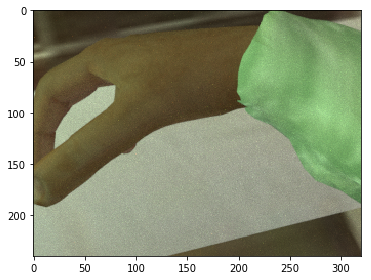

In [8]:
img_io.imshow(hand1_imgs[0])

### get labels

In [9]:
def parse_label_file(fp):
    with open(fp, 'r') as f:
        label_dict = json.load(f)
        
    return label_dict

In [10]:
hand_label_dir = config['synth_hand_path'] + image_sub_dir[0] + 'label/'
label_files = sorted(glob.glob(hand_label_dir + '*.json'))

assert len(label_files) == 10000, "label file number not enough"

if config['load_min']:
    label_files = label_files[:config['min_size']]

hand1_labels = [parse_label_file(label_file) for label_file in label_files]
hand1_labels[0]

{'bbox': {'R': [-16, 6, 249, 200]},
 'keypoint': {'R': {'f_index.01.head': [63, 42, 1],
   'f_index.02.head': [18, 70, 1],
   'f_index.03.head': [3, 113, 1],
   'f_index.03.tail': [6, 158, 2],
   'f_middle.01.head': [92, 36, 2],
   'f_middle.02.head': [54, 56, 2],
   'f_middle.03.head': [26, 83, 2],
   'f_middle.03.tail': [11, 112, 2],
   'f_pinky.01.head': [144, 46, 2],
   'f_pinky.02.head': [129, 55, 2],
   'f_pinky.03.head': [120, 64, 2],
   'f_pinky.03.tail': [111, 73, 2],
   'f_ring.01.head': [118, 37, 2],
   'f_ring.02.head': [93, 67, 2],
   'f_ring.03.head': [86, 97, 2],
   'f_ring.03.tail': [92, 134, 2],
   'palm_middle.head': [187, 55, 1],
   'thumb.01.head': [160, 55, 1],
   'thumb.02.head': [117, 91, 1],
   'thumb.03.head': [47, 143, 1],
   'thumb.03.tail': [5, 177, 1]}}}

### padd hand label with miss hand info

In [11]:
def pad_labels(label):
    """
    remove keypoint info and pad mis hand with 0
    """
    label = label['bbox']
    if 'R' not in label:
        label['R'] = [0, 0, 0, 0]
        
    if 'L' not in label:
        label['L'] = [0, 0, 0, 0]
        
    return label

In [12]:
hand1_labels = list(map(pad_labels, hand1_labels))
hand1_labels[0]

{'L': [0, 0, 0, 0], 'R': [-16, 6, 249, 200]}